# Simple example of convolution in tf

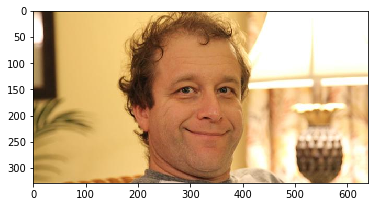

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import misc
%matplotlib inline

def plot_matrix(ma):
    plt.pcolormesh(ma[::-1], cmap=cm.gray, antialiased=True)

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])


mf_color = misc.imread("MF.jpg")
plt.imshow(mf_color)
plt.show()

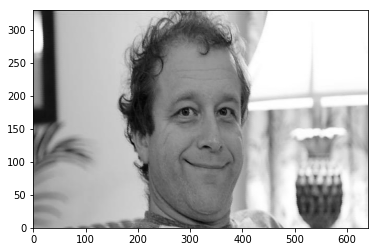

In [2]:
mf = rgb2gray(mf_color)
plot_matrix(mf)

In [3]:
mf = mf.reshape(1,mf.shape[0],mf.shape[1],1)
mf.shape

(1, 329, 640, 1)

### Applying one convolution with some random filter 

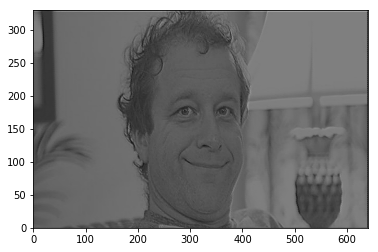

In [4]:
fil = np.array([[-1,-2,-1],[1,0.22,-0.9],[-10,10,10]]) 
fil = fil.reshape((3,3,1,1))
graph = tf.Graph()
with graph.as_default():
    tf_example = tf.constant(mf,dtype="float32")
    tf_fil = tf.constant(fil,dtype="float32")
    conv = tf.nn.conv2d(input=tf_example,
                              filter=tf_fil,
                              strides=[1, 1, 1, 1],
                              padding='SAME')

with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    result = session.run(conv)
result = result.reshape(result.shape[1],result.shape[2])
plot_matrix(result)

### Applying max pooling in the image in [2]

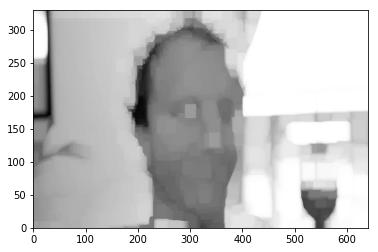

In [5]:
graph = tf.Graph()
with graph.as_default():
    new_example = tf.constant(mf,dtype="float32")
    pool = tf.nn.max_pool(value=new_example,
                          ksize=[1, 20, 20, 1],
                          strides=[1, 1, 1, 1],
                          padding='SAME')    

with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    new_result = session.run(pool)
    new_image = session.run(pool).reshape((new_result.shape[1],new_result.shape[2]))
    
plot_matrix(new_image)

### Applying max avg in the image in [2]

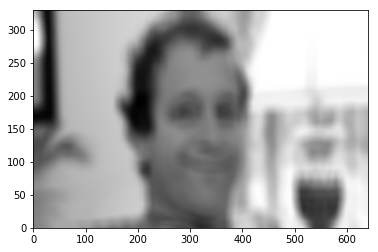

In [6]:
graph = tf.Graph()
with graph.as_default():
    new_example = tf.constant(mf,dtype="float32")
    pool = tf.nn.avg_pool(value=new_example,
                          ksize=[1, 20, 20, 1],
                          strides=[1, 1, 1, 1],
                          padding='SAME')    

with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    new_result = session.run(pool)
    new_image = session.run(pool).reshape((new_result.shape[1],new_result.shape[2]))
    
plot_matrix(new_image)